In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

1) Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [2]:
baseball_batting = pd.read_csv("C:/Users/Alok Sheth/Desktop/Programming/Week4/Batting.csv")

2) Print out the dimensions and info about the dataframe you just created

In [3]:
baseball_batting.shape

(102816, 25)

In [4]:
baseball_batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

3) How many players have hit 40 or more HRs in one single season? (Number only)

In [10]:
df = baseball_batting[['playerID','yearID', 'HR']]
df = df.groupby(['playerID', 'yearID'])
HR = df.sum()
HR40 = HR[HR['HR'] >= 40]
HR40.shape[0]



330

4) How many players have hit 600 or more HRs for their career? (Dataframe with name and player first and last name only and amount of HRs)

In [12]:
df1= baseball_batting[['playerID','nameFirst','nameLast','HR']]
df1 = df1.groupby(['playerID','nameFirst','nameLast'], as_index = False)
HR = df1.sum()
HR600 = HR[HR['HR'] >= 600]
HR600 = HR600.drop('playerID', axis =1)
HR600

,nameFirst,nameLast,HR
1,Hank,Aaron,755
1542,Barry,Bonds,762
6633,Ken,Griffey,630
10857,Willie,Mays,660
14528,Alex,Rodriguez,696
14865,Babe,Ruth,714
16103,Sammy,Sosa,609
17004,Jim,Thome,612


5) How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)

In [13]:
df2 = baseball_batting[['playerID','yearID','H','2B','3B','HR']]
df2 = df2.groupby(['playerID', 'yearID'])
hits = df2.sum()
hits = hits[hits['H'] >= 200] 
hits =hits[hits['2B'] >= 40] 
hits =hits[hits['3B'] >= 10] 
hits =hits[hits['HR'] >= 30]
hits.shape[0]



16

6) How many players seasons have had 100 or more SBs? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs )

In [8]:
df3 = baseball_batting[['playerID','nameFirst','nameLast','yearID','SB']]

df3 = df3.groupby(['playerID','nameFirst','nameLast','yearID'], as_index= False)
SB = df3.sum()
SB100 = SB[SB['SB'] >= 100]
SB100 = SB100.drop('playerID', axis =1)
SB100.sort_values('SB', ascending=False)

,nameFirst,nameLast,yearID,SB
62362,Hugh,Nicol,1887,138.0
37059,Rickey,Henderson,1982,130.0
48268,Arlie,Latham,1887,129.0
9713,Lou,Brock,1974,118.0
16703,Charlie,Comiskey,1887,117.0
34649,Billy,Hamilton,1889,111.0
89859,John,Ward,1887,111.0
34651,Billy,Hamilton,1891,111.0
16351,Vince,Coleman,1985,110.0
16353,Vince,Coleman,1987,109.0


7) How many players in the 1960s (yearID) have hit 200 or more HRs? (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)

In [20]:
df4 = baseball_batting[['playerID', 'yearID', 'nameFirst','nameLast','HR']]
df4 = df4[df4['yearID'] >= 1960] 
df4 = df4[df4['yearID'] < 1970]
df4 = df4.groupby(['playerID','nameFirst','nameLast'], as_index=False)
df4 = df4.sum()
df4.drop(['playerID','yearID'],axis=1)
HR200 = df4[df4['HR'] >= 200]
HR200 = HR200.drop(['playerID'], axis=1)
HR200


,nameFirst,nameLast,yearID,HR
0,Hank,Aaron,19645,375
19,Bob,Allison,19645,225
70,Ernie,Banks,19645,269
279,Norm,Cash,19645,278
283,Orlando,Cepeda,21611,254
323,Rocky,Colavito,21611,245
751,Frank,Howard,19645,288
830,Al,Kaline,19645,210
856,Harmon,Killebrew,19645,393
1009,Mickey,Mantle,17676,256


8) Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)

In [24]:
df5 = baseball_batting[['playerID','nameFirst','nameLast','HR']]
df5 = df5.groupby(['playerID','nameFirst','nameLast'], as_index=False)
df5 = df5.sum()
MAXHR = df5.groupby(['playerID','nameFirst','nameLast'], as_index=False)
MAXHR_df = MAXHR.aggregate(np.max)
idx = MAXHR_df['HR'].idxmax()
MAXHR_df.loc[idx]

playerID     bondsba01
nameFirst        Barry
nameLast         Bonds
HR                 762
Name: 1542, dtype: object

9)	Who had the most hits (H) in the 1970s? (Dataframe)

In [11]:
df6 = baseball_batting[['playerID', 'yearID','nameFirst','nameLast','H']]
df6 = df6[df6['yearID'] >= 1970]
df6 = df6[df6['yearID'] < 1980]
df6 = df6.groupby(['playerID','nameFirst','nameLast'], as_index=False)
df6 = df6.sum()
maxh = df6.groupby(['playerID','nameFirst','nameLast'], as_index=False)
maxh_df = maxh.aggregate(np.max)
maxh_df = maxh_df.drop(['yearID'], axis=1)
idx = maxh_df['H'].idxmax()
maxh_df.loc[idx]

playerID     rosepe01
nameFirst        Pete
nameLast         Rose
H                2045
Name: 1639, dtype: object

10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe, first name, last name, OBP, ordered descending by OBP)

In [29]:
baseball_batting['PA'] = baseball_batting['AB'] + baseball_batting['BB'] + baseball_batting['HBP'] + baseball_batting['SH'] + baseball_batting['SF']
df7 = baseball_batting[baseball_batting['yearID'] == 1977]
df7 = df7[df7['PA'] >= 500]
df7['OBP'] = (df7['H'] + df7['BB'] + df7['HBP'])/(df7['AB'] + df7['BB'] + df7['HBP'] + df7['SF'])
df7_obp = df7[['playerID','nameFirst','nameLast','OBP']]
df7_obp_groupby = df7_obp.groupby(['playerID'], as_index=False)
df7_obp_groupby = df7_obp.sum()
df7_obp_groupby = df7_obp['OBP'].nlargest(5)
indices = df7_obp_groupby.keys()
indices = indices.tolist()
df7.ix[indices]

C:\Users\Alok Sheth\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP
54603,carewro01,Rod,Carew,1945,1977,1,MIN,AL,155,616,...,13.0,69,55.0,15.0,3.0,1.0,5.0,6.0,694.0,0.448773
55273,singlke01,Ken,Singleton,1947,1977,1,BAL,AL,152,536,...,1.0,107,101.0,13.0,2.0,0.0,6.0,15.0,651.0,0.437788
55280,smithre06,Reggie,Smith,1945,1977,1,LAN,NL,148,488,...,5.0,104,76.0,11.0,3.0,1.0,7.0,5.0,603.0,0.426910
54820,hargrmi01,Mike,Hargrove,1949,1977,1,TEX,AL,153,525,...,5.0,103,59.0,7.0,6.0,8.0,6.0,13.0,648.0,0.420312
55095,morgajo02,Joe,Morgan,1943,1977,1,CIN,NL,153,521,...,10.0,117,58.0,2.0,2.0,0.0,5.0,5.0,645.0,0.417054


11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)

In [13]:
baseball_batting['average'] = baseball_batting['H']/baseball_batting['AB']
df9 = baseball_batting[baseball_batting['yearID'] == 2013]
df9 = df9[df9['PA'] >= 300]
df9_groupby = df9.groupby(['playerID','nameFirst','nameLast','average'], as_index=False)
df9_groupby = df9['average'].nlargest(8)
indices = df9_groupby.keys()
indices = indices.tolist()
df9.ix[indices]

C:\Users\Alok Sheth\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,average
97188,cabremi01,Miguel,Cabrera,1983,2013,1,DET,AL,148,555,...,0.0,90,94.0,19.0,5.0,0.0,2.0,19.0,652.0,0.347748
98062,ramirha01,Hanley,Ramirez,1983,2013,1,LAN,NL,86,304,...,2.0,27,52.0,3.0,3.0,0.0,2.0,5.0,336.0,0.345395
97300,cuddymi01,Michael,Cuddyer,1979,2013,1,COL,NL,130,489,...,3.0,46,100.0,5.0,2.0,0.0,3.0,13.0,540.0,0.331288
97825,mauerjo01,Joe,Mauer,1983,2013,1,MIN,AL,113,445,...,1.0,61,89.0,7.0,0.0,0.0,2.0,7.0,508.0,0.323596
98293,troutmi01,Mike,Trout,1991,2013,1,LAA,AL,157,589,...,7.0,110,136.0,10.0,9.0,0.0,8.0,8.0,716.0,0.322581
97651,johnsch05,Chris,Johnson,1984,2013,1,ATL,NL,142,514,...,0.0,29,116.0,5.0,2.0,0.0,2.0,20.0,547.0,0.321012
97437,freemfr01,Freddie,Freeman,1989,2013,1,ATL,NL,147,551,...,0.0,66,121.0,10.0,7.0,0.0,5.0,10.0,629.0,0.319419
98043,puigya01,Yasiel,Puig,1990,2013,1,LAN,NL,104,382,...,8.0,36,97.0,6.0,11.0,0.0,3.0,6.0,432.0,0.319372


12)	Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits)

In [30]:
df8 = baseball_batting[baseball_batting['yearID'] >= 1940]
df8 = df8[df8['yearID'] < 1949]
df8 = df8[['playerID','nameFirst','nameLast','H']]
df8 = df8.groupby(['playerID', 'nameFirst', 'nameLast'],as_index=False)
df8 = df8.aggregate(np.sum)
df8 = df8.drop('playerID', axis=1)
df8.sort_values('H', ascending=False)

,nameFirst,nameLast,H
1487,Dixie,Walker,1461
131,Lou,Boudreau,1443
405,Bob,Elliott,1428
675,Tommy,Holmes,1301
1593,Rudy,York,1266
947,Frank,McCormick,1261
1067,Bill,Nicholson,1258
371,Bobby,Doerr,1240
31,Luke,Appling,1228
1046,Stan,Musial,1225


13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)

In [33]:
df9 = baseball_batting[['nameFirst','nameLast','yearID','H']]
df9 = df9.groupby(['nameFirst','nameLast','yearID'], as_index=False)
df9 = df9.aggregate(np.sum)
df9 = df9.nlargest(20, 'H')
df9 = df9[(df9['nameFirst'] == 'George') & (df9['nameLast'] == 'Burns')]
df9.sort_values('H', ascending=False)


,nameFirst,nameLast,yearID,H
36303,George,Burns,1922,351
36304,George,Burns,1923,349
36299,George,Burns,1918,313
36297,George,Burns,1916,311
36295,George,Burns,1914,309
36300,George,Burns,1919,301
36298,George,Burns,1917,272
36302,George,Burns,1921,269
36296,George,Burns,1915,268
36306,George,Burns,1925,266


14)	 Which players have played the most games for their careers?  Top 5 first name, last name, descending by games played presented as a dataframe

In [36]:
df10 = baseball_batting[['playerID','nameFirst','nameLast','G']]
df10 = df10.groupby(['playerID','nameFirst','nameLast'], as_index=False)
df10 = df10.aggregate(np.sum)
df10 = df10.sort_values('G', ascending=False)
df10 = df10.reset_index()
df10= df10.drop(['index','playerID'],axis=1)
df10

,nameFirst,nameLast,G
0,Pete,Rose,3562
1,Carl,Yastrzemski,3308
2,Hank,Aaron,3298
3,Rickey,Henderson,3081
4,Ty,Cobb,3035
5,Eddie,Murray,3026
6,Stan,Musial,3026
7,Cal,Ripken,3001
8,Willie,Mays,2992
9,Barry,Bonds,2986


15)	How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [37]:
df11 = baseball_batting[['playerID','H','HR']]
df11 = df11.groupby(['playerID'], as_index=False)
df11 = df11.aggregate(np.sum)
df11 = df11[df11['H'] >= 3000]
df11 = df11[df11['HR'] >= 500]
df11.shape[0]

5

16)	 How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [38]:
df12 = baseball_batting[baseball_batting['yearID'] == 1988]
df12 = df12[['HR']]
df12.sum()

HR    3180
dtype: int64

17)	 Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs.  Dataframe, first name, last name, average, descending by average

In [39]:
df17 =baseball_batting[(baseball_batting['nameFirst'] == 'Wade') & (baseball_batting['nameLast'] == 'Boggs')]
df17 = df17[df17['AB'] >= 500]
df17 = df17[['nameFirst','nameLast', 'yearID', 'average']]
df17 = df17.nlargest(3,'average')
df17 = df17.reset_index()
df17

KeyError: "['average'] not in index"

18) Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  Dataframe with first name, last name, OBP

In [40]:
baseball_batting['OBP'] = (baseball_batting['H'] + baseball_batting['BB'] + baseball_batting['HBP'])/(baseball_batting['AB'] + baseball_batting['BB'] + baseball_batting['HBP'] + baseball_batting['SF'])
df18 = baseball_batting[(baseball_batting['yearID'] == 1995) & (baseball_batting['PA'] >= 400)]
df18 = df18[['nameFirst','nameLast','yearID','OBP']]
df18 = df18.groupby(['nameFirst','nameLast'], as_index=False)
df18 = df18.aggregate(np.sum)
df18 =df18.nlargest(10, 'OBP')
df18 =df18.reset_index()
df18 = df18.drop(['index','yearID'], axis=1)
df18

,nameFirst,nameLast,OBP
0,Edgar,Martinez,0.478873
1,Frank,Thomas,0.454405
2,Mark,McGwire,0.440758
3,Jim,Thome,0.438061
4,Barry,Bonds,0.431496
5,Tim,Salmon,0.429467
6,Chili,Davis,0.429119
7,Dave,Magadan,0.427553
8,Chuck,Knoblauch,0.424483
9,Tim,Naehring,0.414729


19)	Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, last name, number of 3Bs

In [41]:
df19 = baseball_batting[baseball_batting['yearID'].isin(['1922','1925','1926','1928'])]
df19 = df19[['nameFirst','nameLast','3B']]
df19 = df19.groupby(['nameFirst','nameLast'], as_index=False)
df19 = df19.aggregate(np.sum)
df19.nlargest(1,'3B')

,nameFirst,nameLast,3B
237,Curt,Walker,59


20)	How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [42]:
df20 = baseball_batting[['playerID','yearID','HR','3B','SB']]
df20 = df20.groupby(['playerID','yearID'], as_index=False)
df20 = df20.aggregate(np.sum)
df20 = df20[(df20['SB'] > 30) & (df20['HR'] > 30)]
df20.shape[0]

47

21) Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)

In [43]:
df21 = baseball_batting[(baseball_batting['yearID'] == 1986) & (baseball_batting['AB'] >= 400)]
df21 = df21[['nameFirst','nameLast','OBP']]
df21 = df21.groupby(['nameFirst','nameLast'], as_index=False)
df21 = df21.aggregate(np.sum)
df21.nlargest(1,'OBP')

,nameFirst,nameLast,OBP
146,Wade,Boggs,0.45283


22)	Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)

In [44]:
df22 = baseball_batting[(baseball_batting['yearID'] == 1997) & (baseball_batting['lgID'] == 'NL') & (baseball_batting['AB'] >= 400)]
df22 = df22[['nameFirst','nameLast','OBP']]
df22 = df22.groupby(['nameFirst','nameLast'], as_index=False)
df22 = df22.aggregate(np.sum)
df22.nlargest(1,'OBP')

,nameFirst,nameLast,OBP
48,Larry,Walker,0.451807


23)	Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)

In [45]:
baseball_batting_2012 = baseball_batting[(baseball_batting['yearID'] == 2012) & (baseball_batting['AB'] > 500) & (baseball_batting['AB'] >= 500)]
hr_2012_avg = baseball_batting_2012['HR'].mean()
df23 = baseball_batting_2012[baseball_batting_2012['HR'] > hr_2012_avg]
df23 = df23[['nameFirst','nameLast','HR']]
df23 = df23.sort_values('HR', ascending=False)
df23 =df23.reset_index()
df23 = df23.drop(['index'],axis=1)
df23

,nameFirst,nameLast,HR
0,Miguel,Cabrera,44
1,Josh,Hamilton,43
2,Curtis,Granderson,43
3,Edwin,Encarnacion,42
4,Ryan,Braun,41
5,Adam,Dunn,41
6,Adrian,Beltre,36
7,Josh,Willingham,35
8,Jay,Bruce,34
9,Adam,LaRoche,33


24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)

In [46]:
baseball_batting['age'] = baseball_batting['yearID'] - baseball_batting['birthYear']
df24 = baseball_batting[['nameFirst','nameLast','yearID','HR','age']]
df24 = df24.groupby(['nameFirst','nameLast','yearID','age'], as_index=False)['HR']
df24 = df24.aggregate(np.sum)
df24 = df24[df24['HR'] >= 50]
df24 = df24.nsmallest(1, 'age')
df24 = df24.drop('age', axis=1)
df24

,nameFirst,nameLast,yearID,HR
74852,Prince,Fielder,2007,50


25)	Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 300 HRs)

In [47]:
# Get all players who scored more than 300 HRs in their career
df25 = baseball_batting[['playerID','yearID','nameFirst','nameLast','HR']]
df25 = df25.groupby(['playerID','nameFirst','nameLast'],as_index=False)
df25 = df25.aggregate(np.sum)
df25 = df25[df25['HR'] >= 300]

#create an empty dataframe
hr_columns = ['playerID','nameFirst','nameLast','age','season']
hr_df = pd.DataFrame(columns=hr_columns)

#Append empty dataframe with rows when player crossed 300 HRs
for index,row in df25.iterrows():
    player = baseball_batting[baseball_batting['playerID'] == row['playerID']]
    total_hr = 0
    for i in range(0, player.shape[0]):
        hr = player.iloc[i]['HR']
        total_hr += hr
        if (total_hr+hr >= 300):
            df = pd.DataFrame([[player.iloc[i]['playerID'],player.iloc[i]['nameFirst'],player.iloc[i]['nameLast'],int(player.iloc[i]['age']),player.iloc[i]['yearID']]],columns=hr_columns)
            hr_df = hr_df.append(df,ignore_index=True)
            break
            
#convert age from object to int
hr_df[['age']] = hr_df[['age']].astype(int)
hr_df = hr_df.nsmallest(5,'age')
hr_df = hr_df.drop(['playerID','age'], axis=1)
hr_df = hr_df.reset_index().drop('index',axis=1)
hr_df

,nameFirst,nameLast,season
0,Jimmie,Foxx,1934
1,Mel,Ott,1936
2,Albert,Pujols,2007
3,Alex,Rodriguez,2002
4,Hank,Aaron,1962


26) Graph total HRs per season using bar graph

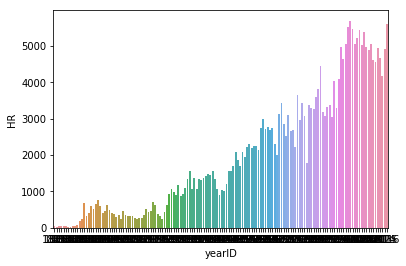

In [48]:
df26 = baseball_batting[['yearID','HR']]
df26 = df26.groupby('yearID', as_index=False)
df26 = df26.aggregate(np.sum)
sns.barplot(x='yearID',y='HR',data=df26)

27) Using a line graph please graph the average HRs per AB (think about this) per season

Populating the interactive namespace from numpy and matplotlib


C:\Users\Alok Sheth\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


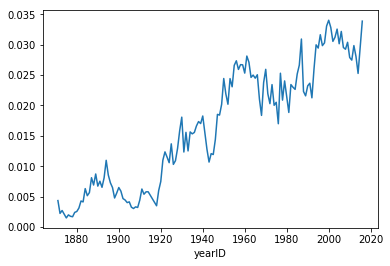

In [49]:
import matplotlib.pyplot as plt
%pylab inline
g = baseball_batting.groupby('yearID').sum()
g['AverageHRs'] = g['HR']/g['AB']
g['AverageHRs'].plot()